
# Домашнее задание №1
## Ивашов Игорь
### Сбер DS 




## Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить ее в pandas dataframe
* Cохранить pandas dataframe в excel
* Cохранить pandas dataframe в pickle
* Cохранить pandas dataframe в БД

## Задание *
* Написать скрипт, который скачивает фотографии всех строящихся объектов с сайта "наш.дом.рф"


Импортируем библиотеку запросов чтобы обратиться к сайту за данными

In [2]:
import requests

Получение списока объектов

In [3]:
def get_data_from_sute_ids(x):
  #вытаскиваем по 500 объектов
  offset_ = x
  limit_ = x+499 #буду по 500 собирать
  url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
  res = requests.get(url)
  if res.ok:
    #print(res.status_code)
    objects_data = res.json()
    return objects_data['data']['list'] #возвращаем данные
  else:
    print('error')
    

In [5]:
#работает минут 30 не меньше
objId = []

for n in range(0,11100,500):
    for objects in get_data_from_sute_ids(n):
    #print(objects['objId'])
        objId.append(objects['objId'])

#print(objId)
print('количество',len(objId))



[13391, 13397, 13399, 13383, 13398, 23682, 36321, 37071, 36912, 23494, 27473, 27475, 27474, 27476, 26194, 10891, 39175, 39174, 39176, 27049, 33928, 41421, 41420, 30292, 18363, 18708, 18709, 21535, 9336, 9335, 21537, 21534, 21536, 30243, 39319, 41624, 41625, 39741, 26503, 42192, 38871, 27542, 26903, 20524, 29184, 27779, 24093, 35830, 32838, 32836, 32813, 32835, 32830, 32843, 32820, 23862, 32842, 32827, 32825, 27798, 32833, 27808, 32829, 32839, 32815, 32812, 32841, 23863, 32826, 32823, 32840, 27803, 32828, 32832, 23864, 32831, 32818, 32816, 32837, 32834, 27802, 32817, 32824, 27807, 32814, 32819, 32811, 27801, 27806, 22377, 22376, 22375, 22378, 22379, 21720, 33899, 4402, 17712, 17707, 33745, 40061, 39130, 44621, 44474, 44489, 15888, 15889, 15886, 15891, 15885, 15890, 37264, 24823, 41617, 41618, 24820, 41615, 41616, 3429, 41614, 41612, 41619, 24822, 24818, 41621, 41620, 24817, 24819, 41613, 22946, 31879, 2972, 2968, 2969, 2967, 18135, 18136, 42366, 42365, 44752, 32080, 32082, 37465, 33525,

уберем дубли из id шников

In [36]:
un_objId=[] #список уникальных id объектов
#print(objId)
for x in objId:
  if x not in un_objId:
    un_objId.append(x)
print(len(un_objId))

10095


In [37]:
obj_df = pd.DataFrame({'ObjId':un_objId})
#save to csv
obj_df.to_csv('obj_Id.csv', encoding='utf-8', index=False)
#Cохранить pandas dataframe в excel
obj_df.to_excel('obj_Id.xlsx')
#Cохранить pandas dataframe в pickle
obj_df.to_pickle("obj_Id.pkl") 


In [41]:
#Cохранить pandas dataframe в БД
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

obj_df.to_sql('OBJ_ID_T', con=engine, if_exists='replace')


In [39]:
#проверка БД запрос в табличку 
engine.execute("SELECT  * FROM OBJ_ID_T").fetchall()

[(0, 13391),
 (1, 13397),
 (2, 13399),
 (3, 13383),
 (4, 13398),
 (5, 23682),
 (6, 36321),
 (7, 37071),
 (8, 36912),
 (9, 23494),
 (10, 27473),
 (11, 27475),
 (12, 27474),
 (13, 27476),
 (14, 26194),
 (15, 10891),
 (16, 39175),
 (17, 39174),
 (18, 39176),
 (19, 27049),
 (20, 33928),
 (21, 41421),
 (22, 41420),
 (23, 30292),
 (24, 18363),
 (25, 18708),
 (26, 18709),
 (27, 21535),
 (28, 9336),
 (29, 9335),
 (30, 21537),
 (31, 21534),
 (32, 21536),
 (33, 30243),
 (34, 39319),
 (35, 41624),
 (36, 41625),
 (37, 39741),
 (38, 26503),
 (39, 42192),
 (40, 38871),
 (41, 27542),
 (42, 26903),
 (43, 20524),
 (44, 29184),
 (45, 27779),
 (46, 24093),
 (47, 35830),
 (48, 32838),
 (49, 32836),
 (50, 32813),
 (51, 32835),
 (52, 32830),
 (53, 32843),
 (54, 32820),
 (55, 23862),
 (56, 32842),
 (57, 32827),
 (58, 32825),
 (59, 27798),
 (60, 32833),
 (61, 27808),
 (62, 32829),
 (63, 32839),
 (64, 32815),
 (65, 32812),
 (66, 32841),
 (67, 23863),
 (68, 32826),
 (69, 32823),
 (70, 32840),
 (71, 27803),
 (72

# Данные по определенному объекту

в итоге у нас есть лист с id объектов сайта - 10095шт (29/01/2022) obj_df

In [7]:
import pandas as pd

In [44]:
#create new df
#obj_df = pd.read_csv('obj_Id.csv')
#obj_df = pd.DataFrame({'ObjId':un_objId})
#obj_df = read_csv('obj_Id.csv')
#print (obj_df)

In [16]:
def get_data_from_sute_obj(un_objId_):
  #вытаскивает json по id   объекта недвижимости
  url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{un_objId_}'
  try:
    res = requests.get(url)
  except:
    print('ops')
  return res.json()

In [17]:
objId_=un_objId[-1] #проверка по последнему
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{objId_}'
res = requests.get(url).json()
# посмотрим как это выглядит

In [ ]:
#df = pd.json_normalize(res.json())
#df

,errcode,data.id,data.pdId,data.developer.devId,data.developer.devShortCleanNm,data.developer.devShortNm,data.developer.devFullCleanNm,data.developer.problObjCnt,data.developer.buildObjCnt,data.developer.comissObjCnt,data.developer.regRegionDesc,data.developer.devPhoneNum,data.developer.devSite,data.developer.devEmail,data.developer.devInn,data.developer.devOgrn,data.developer.devKpp,data.developer.devLegalAddr,data.developer.devFactAddr,data.developer.lastRpdId,data.developer.fundGuarantyFlg,data.developer.devOrgRegRegionCd,data.developer.devEmplMainFullNm,data.developer.developerGroupName,data.developer.orgForm.id,data.developer.orgForm.fullForm,data.developer.orgForm.shortForm,data.developer.companyGroupId,data.developer.objGuarantyEscrowFlg,data.developer.govFundFlg,data.region,data.address,data.nameObj,data.floorMin,data.floorMax,data.objElemLivingCnt,data.objReady100PercDt,data.wallMaterialShortDesc,data.objLkFinishTypeDesc,data.objLkFreePlanDesc,...,data.photoRenderDTO,data.objGuarantyEscrowFlg,data.objectType,data.miniUrl,data.residentialBuildings,data.newBuildingId,data.objFloorCnt,data.objFlatCnt,data.objFlatSq,data.objNonlivElemCnt,data.quartography.objLivElem1KCnt,data.quartography.objLivElem2KCnt,data.quartography.objLivElem3KCnt,data.quartography.objLivElem4KCnt,data.quartography.objLivElemCnt,data.quartography.objLivElemEntrCnt,data.quartography.objLivElemEntrFloorAvg,data.objStatus,data.isAvailableWantLiveHere,data.objTransferPlanDt,data.objLivCeilingHeight,data.objInfrstrBicycleLaneFlg,data.objInfrstrPlaygrndCnt,data.objInfrstrSportGroundCnt,data.objInfrstrTrashAreaCnt,data.objInfrstrObjPrkngCnt,data.objInfrstrNotObjPrkngCnt,data.objInfrstrRampFlg,data.objInfrstrCurbLoweringFlg,data.objElevatorWheelchairCnt,data.objElevatorPassengerCnt,data.objElevatorCargoCnt,data.soldOutPerc,data.objPriceAvg,data.nonlivFirstFloor,data.objectTransportInfo,data.conclusion,data.objLkSaleDepEmail,data.objGreenHouseFlg,data.objEnergyEffShortDesc
0,0,28000,91796,7339,ЯРУС,ЯРУС,ЯРУС,0,1,0,Рязанская область,+7(491)290-07-00,edinstvo62.ru,info@edinstvo62.ru,6213013559,1186234006606,621301001,"Рязанская область, город Рыбное, улица Веселая...",обл Рязанская г Рыбное ул Веселая д. 25А оф. 1,545301,1,62,Назарова Оксана Николаевна,Единство,4,Общество с ограниченной ответственностью,ООО,156056001,0,0,62,"г Рязань, переулок Парковый, д. 1","Жилой комплекс ""Невский""",20,25,422,2022-03-31,Монолит-кирпич,Под чистовую,Нет,...,"[{'objId': 28000, 'pdId': 91796, 'rpdId': 5453...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,25062,25,422,22936.0,107,244,108,70,0,422,2,9,0,True,30-06-2022 12:00,"2,5",0,1,0,1,0,0,0,1,2,4,0,0.966994,50881,0,[],False,info@edinstvo62.ru,0,C


In [19]:
import time #библиотека времени

df_all = pd.DataFrame() #очищаем

for id in un_objId: #перебираем все Id из списка ID объектов
  #print(id)
  df = pd.json_normalize(get_data_from_sute_obj(id)) #получаем карточку объекта
  df_all = pd.concat([df_all, df]) #дописываем в общий датафрэйм
  time.sleep(0.1)
print (df_all.head()) #посмотрим что получилось

  errcode  data.id  data.pdId  data.developer.devId  \
0       0    13391      28101                   306   
0       0    13397      28141                   306   
0       0    13399      28141                   306   
0       0    13383      28105                   306   
0       0    13398      28141                   306   

  data.developer.devShortCleanNm data.developer.devShortNm  \
0                     2МЕН ГРУПП                2МЕН ГРУПП   
0                     2МЕН ГРУПП                2МЕН ГРУПП   
0                     2МЕН ГРУПП                2МЕН ГРУПП   
0                     2МЕН ГРУПП                2МЕН ГРУПП   
0                     2МЕН ГРУПП                2МЕН ГРУПП   

  data.developer.devFullCleanNm  data.developer.problObjCnt  \
0                    2МЕН ГРУПП                           0   
0                    2МЕН ГРУПП                           0   
0                    2МЕН ГРУПП                           0   
0                    2МЕН ГРУПП             

In [21]:
df_all

,errcode,data.id,data.pdId,data.developer.devId,data.developer.devShortCleanNm,data.developer.devShortNm,data.developer.devFullCleanNm,data.developer.problObjCnt,data.developer.buildObjCnt,data.developer.comissObjCnt,...,data.metro.color,data.metro.time,data.metro.isWalk,data.metro.colors,data.transportDistIndex,data.complexShortNm,data.developer.bankruptStage.bankruptStageCd,data.developer.bankruptStage.bankruptStageDesc,data.developer.bankruptStage.bankruptLawUrl,data.developer.orgBankruptMsgDttm
0,0,13391,28101,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,13397,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,13399,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,13383,28105,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,13398,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,28071,99284,7344,ЯРКИЙ МИР,ЯРКИЙ МИР,ЯРКИЙ МИР,0,5,0,...,#943E90,20.716667,False,[#943E90],NaN,NaN,NaN,NaN,NaN,NaN
0,0,44447,475093,2538,ЯРОСЛАВЛЬЗАКАЗЧИК,ЯРОСЛАВЛЬЗАКАЗЧИК,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ЯРОСЛАВЛЬЗАКАЗЧИК,0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,28000,91796,7339,ЯРУС,ЯРУС,ЯРУС,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,44023,532547,10854,ЯСН,ЯСН,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ЯРСТРОЙНЕДВИЖИМОСТЬ,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#save to csv
df_all.to_csv('df_obj_all.csv',encoding='utf-8',index=False)
#Cохранить pandas dataframe в excel
df_all.to_excel('df_obj_all.xlsx')
#Cохранить pandas dataframe в pickle
df_all.to_pickle("df_obj_all.pkl") 


In [62]:
#save to DB SQLITE
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

In [70]:
df_all = df_all.astype(str) #конвертируем все в строки

print (df_all['data.id'])

df_all['data.id'].to_sql('OBJ_ID_T', con=engine, if_exists='replace') #пишим в базу

0    13391
0    13397
0    13399
0    13383
0    13398
     ...  
0    28071
0    44447
0    28000
0    44023
0    37797
Name: data.id, Length: 10095, dtype: object


In [71]:
engine.execute("SELECT  * FROM OBJ_ID_T").fetchall()#проверяем

[(0, '13391'),
 (0, '13397'),
 (0, '13399'),
 (0, '13383'),
 (0, '13398'),
 (0, '23682'),
 (0, '36321'),
 (0, '37071'),
 (0, '36912'),
 (0, '23494'),
 (0, '27473'),
 (0, '27475'),
 (0, '27474'),
 (0, '27476'),
 (0, '26194'),
 (0, '10891'),
 (0, '39175'),
 (0, '39174'),
 (0, '39176'),
 (0, '27049'),
 (0, '33928'),
 (0, '41421'),
 (0, '41420'),
 (0, '30292'),
 (0, '18363'),
 (0, '18708'),
 (0, '18709'),
 (0, '21535'),
 (0, '9336'),
 (0, '9335'),
 (0, '21537'),
 (0, '21534'),
 (0, '21536'),
 (0, '30243'),
 (0, '39319'),
 (0, '41624'),
 (0, '41625'),
 (0, '39741'),
 (0, '26503'),
 (0, '42192'),
 (0, '38871'),
 (0, '27542'),
 (0, '26903'),
 (0, '20524'),
 (0, '29184'),
 (0, '27779'),
 (0, '24093'),
 (0, '35830'),
 (0, '32838'),
 (0, '32836'),
 (0, '32813'),
 (0, '32835'),
 (0, '32830'),
 (0, '32843'),
 (0, '32820'),
 (0, '23862'),
 (0, '32842'),
 (0, '32827'),
 (0, '32825'),
 (0, '27798'),
 (0, '32833'),
 (0, '27808'),
 (0, '32829'),
 (0, '32839'),
 (0, '32815'),
 (0, '32812'),
 (0, '32841'

In [73]:
#df_all = df_all.astype(str) #конвертируем все в строки

#for dfk in df_all.keys():
#    print(df_all[dfk])

df_all.to_sql('OBJ_ALL_T', con=engine, if_exists='replace') #пишим в базу

In [74]:
engine.execute("SELECT  * FROM OBJ_ALL_T").fetchall()#проверяем

[(0, '0', '13391', '28101', '306', '2МЕН ГРУПП', '2МЕН ГРУПП', '2МЕН ГРУПП', '0', '5', '0', 'Тюменская область', '+7(345)279-18-88', '2mengroup.ru', 'info@2mengroup.ru', '7701651356', '1067746424899', '720301001', 'Тюменская область, город Тюмень, улица Комсомольская дом 75/5', 'Тюменская область, город Тюмень, улица Комсомольская 75/5', '551365', '1', '72.0', 'Киселев Сергей Михайлович', '2МЕН ГРУПП ДЕВЕЛОПМЕНТ', '1', 'Акционерное общество', 'АО', '699421001.0', '0', '0', '72', 'г Тюмень, ул Профсоюзная', '3', '12', '44', '2022-06-30', 'Другое', 'По желанию заказчика', 'Есть', '41.0', '4293.67', '72-000096', 'https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/93e09cbc-021d-4f14-a940-20f7ff398171', '14-01-2022 15:59', '57.1541', '65.5595', '1', '0', 'Элитный', '29-01-2022 01:09', "[{'objId': 13391, 'pdId': 28101, 'rpdId': 551365, 'devId': 306, 'ordNum': 1, 'objRenderPhotoSize': 310482, 'objRenderPhotoUrl': 'https://xn--80az8a.x ... (4598 characters truncated) ... enderPhotoNm': 'IMG_20

## Написать скрипт, который скачивает фотографии всех **строящихся** объектов с сайта "наш.дом.рф"

In [28]:
import pandas as pd
import requests
def save_img_to_disk(objId_):
    #по известному адресу отправляем запрос id объекта
    url_obj = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{objId_}'
    #json сохраняем в датафрэйм
    photo_data_url = pd.json_normalize(requests.get(url_obj).json())
    url=''
    file_name =''
    #так как в одном объекте хранится несколько фотографий используем цикл для перебора всех фотографий
    for dpr in range(len(photo_data_url['data.photoRenderDTO'][0])):
        if photo_data_url['data.photoRenderDTO'][0][dpr]['objReadyDesc']=='Строится': #условие что строится объект
            url = (photo_data_url['data.photoRenderDTO'][0][dpr]['objRenderPhotoUrl']) #url до картинки
            id = str(photo_data_url['data.photoRenderDTO'][0][dpr]['objId']) #id объекта для нового названия файла
            file_end = str(photo_data_url['data.photoRenderDTO'][0][dpr]['objRenderPhotoNm'])# старое название файла
            file_name = id+"_"+file_end
            img_data = requests.get(url).content
            with open(file_name, 'wb') as handler:
                handler.write(img_data)



In [34]:
for idd in df_all['data.id'][0:10]: # проверим на первых 10 объектах
    save_img_to_disk(idd)

<AxesSubplot:xlabel='data.objLkLatitude', ylabel='data.objLkLongitude'>

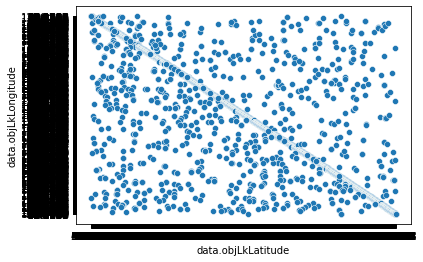

In [56]:
import seaborn

seaborn.scatterplot(y=df_all['data.objLkLongitude'], x=df_all['data.objLkLatitude'])

# анализирую как подготовить данные к загрузке в sqlite

In [49]:
print(df_all.keys())X = X.astype(str)

Index(['errcode', 'data.id', 'data.pdId', 'data.developer.devId',
       'data.developer.devShortCleanNm', 'data.developer.devShortNm',
       'data.developer.devFullCleanNm', 'data.developer.problObjCnt',
       'data.developer.buildObjCnt', 'data.developer.comissObjCnt',
       ...
       'data.metro.color', 'data.metro.time', 'data.metro.isWalk',
       'data.metro.colors', 'data.transportDistIndex', 'data.complexShortNm',
       'data.developer.bankruptStage.bankruptStageCd',
       'data.developer.bankruptStage.bankruptStageDesc',
       'data.developer.bankruptStage.bankruptLawUrl',
       'data.developer.orgBankruptMsgDttm'],
      dtype='object', length=105)
